# * contains preprocessing,  Feature extraction and ML implementation

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [106]:
df = pd.read_csv('E4_ACC_data.csv')
df.head()

,datatime,acc_x,acc_y,acc_z,label,subject_id,round
0,2021-10-27 16:19:17+00:00,-14,22,55,standing,2,1
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,standing,2,1
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,standing,2,1
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,standing,2,1
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,standing,2,1


In [107]:
df.describe()

,acc_x,acc_y,acc_z,subject_id,round
count,137406.000000,137406.000000,137406.000000,137406.000000,137406.0
mean,-7.083475,4.495481,19.134397,2.829745,1.0
std,38.658922,43.926624,27.150544,1.404228,0.0
min,-128.000000,-128.000000,-128.000000,1.000000,1.0
25%,-40.000000,-17.000000,-1.000000,2.000000,1.0
50%,-12.000000,-4.000000,15.000000,3.000000,1.0
75%,22.000000,33.000000,46.000000,4.000000,1.0
max,127.000000,127.000000,127.000000,5.000000,1.0


In [108]:
df.shape

(137406, 7)

In [109]:
df.isnull().any()

datatime      False
acc_x         False
acc_y         False
acc_z         False
label         False
subject_id    False
round         False
dtype: bool

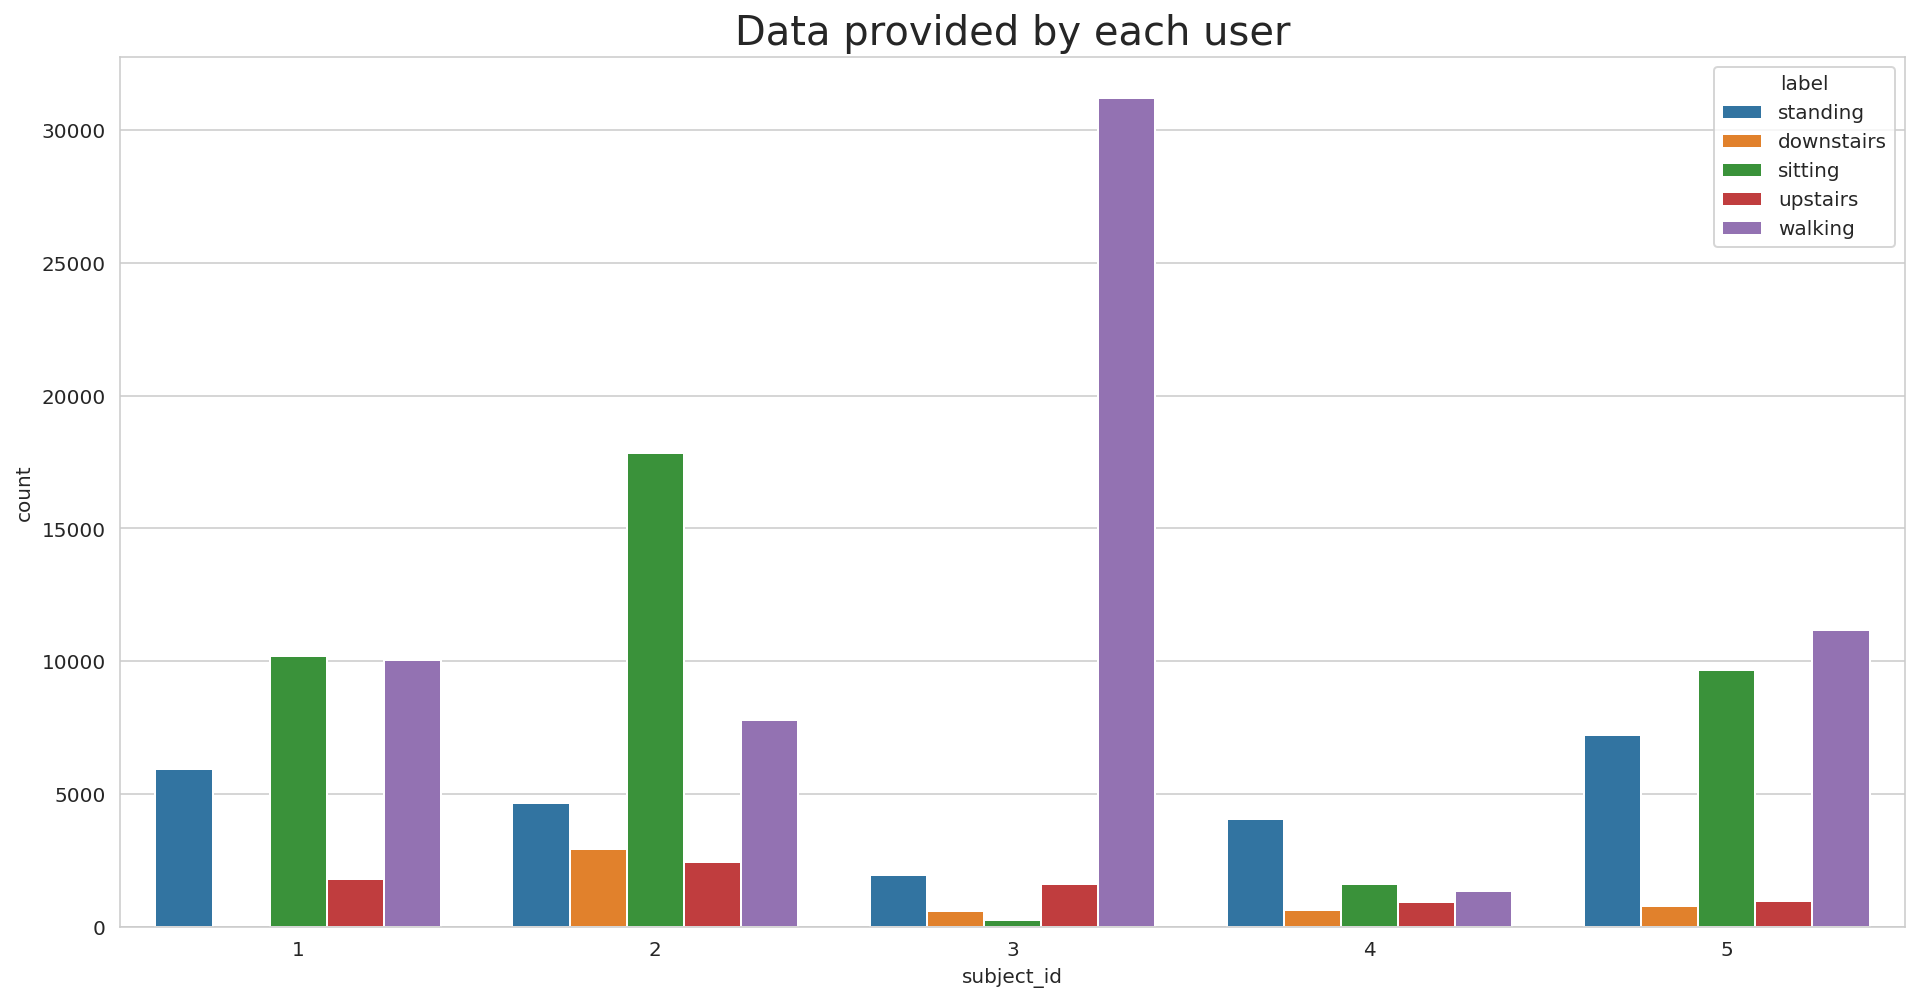

In [110]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = df)
plt.show()

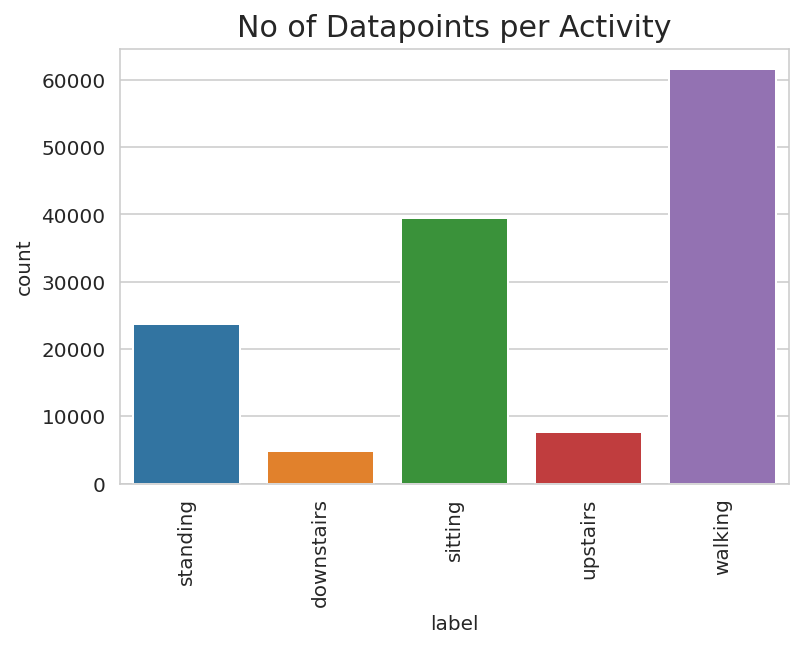

In [111]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(df.label)
plt.xticks(rotation=90)
plt.show()

In [112]:
df = df.reindex(columns = ['acc_x', 'acc_y', 'acc_z', 'subject_id', 'label', 'Magnitude', 'round'])
df

,acc_x,acc_y,acc_z,subject_id,label,Magnitude,round
0,-14,22,55,2,standing,NaN,1
1,-4,25,61,2,standing,NaN,1
2,-7,21,59,2,standing,NaN,1
3,-15,20,59,2,standing,NaN,1
4,-11,22,66,2,standing,NaN,1
...,...,...,...,...,...,...,...
137401,-24,22,37,3,walking,NaN,1
137402,-20,15,47,3,walking,NaN,1
137403,-10,13,58,3,walking,NaN,1
137404,-11,11,65,3,walking,NaN,1


# create magnitude from x, y, z component

In [113]:
df['Magnitude'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)
df['Magnitude']


0         60.868711
1         66.045439
2         63.015871
3         64.078077
4         70.434367
            ...    
137401    49.284886
137402    53.235327
137403    60.274373
137404    66.835619
137405    79.686887
Name: Magnitude, Length: 137406, dtype: float64

In [114]:
df = df.reindex(columns = ['acc_x', 'acc_y', 'acc_z', 'subject_id', 'label', 'Magnitude', 'round'])
df

,acc_x,acc_y,acc_z,subject_id,label,Magnitude,round
0,-14,22,55,2,standing,60.868711,1
1,-4,25,61,2,standing,66.045439,1
2,-7,21,59,2,standing,63.015871,1
3,-15,20,59,2,standing,64.078077,1
4,-11,22,66,2,standing,70.434367,1
...,...,...,...,...,...,...,...
137401,-24,22,37,3,walking,49.284886,1
137402,-20,15,47,3,walking,53.235327,1
137403,-10,13,58,3,walking,60.274373,1
137404,-11,11,65,3,walking,66.835619,1


In [115]:
df

,acc_x,acc_y,acc_z,subject_id,label,Magnitude,round
0,-14,22,55,2,standing,60.868711,1
1,-4,25,61,2,standing,66.045439,1
2,-7,21,59,2,standing,63.015871,1
3,-15,20,59,2,standing,64.078077,1
4,-11,22,66,2,standing,70.434367,1
...,...,...,...,...,...,...,...
137401,-24,22,37,3,walking,49.284886,1
137402,-20,15,47,3,walking,53.235327,1
137403,-10,13,58,3,walking,60.274373,1
137404,-11,11,65,3,walking,66.835619,1


In [116]:
df2 = df.rolling(40).median().dropna()
df2

#plot

,acc_x,acc_y,acc_z,subject_id,Magnitude,round
39,-42.0,19.0,44.0,2.0,63.071380,1.0
40,-42.5,18.5,44.0,2.0,63.071380,1.0
41,-43.0,18.5,43.5,2.0,63.039670,1.0
42,-43.5,18.5,43.0,2.0,63.039670,1.0
43,-44.0,18.5,43.0,2.0,63.039670,1.0
...,...,...,...,...,...,...
137401,-31.5,42.5,41.0,3.0,69.054267,1.0
137402,-30.0,42.5,41.0,3.0,68.873012,1.0
137403,-29.0,42.5,41.0,3.0,68.162422,1.0
137404,-28.5,42.5,41.5,3.0,68.162422,1.0


In [79]:
rolled = pd.DataFrame(columns = ['acc_x', 'acc_y', 'acc_z', 'label', 'subject_id', 'Magnitude', 'round'])

for i in pd.unique(df['subject_id']):
    for j in pd.unique(df['label']):
        for k in pd.unique(df['round']):
            df_new = df[(df['subject_id'] == i) & (df['label'] == j) & (df['round'] == k)]
            df_roll = df_new.rolling(40).mean().dropna()
            df_roll['label'] = j
            df_roll['round'] = k
            df_roll['subject_id'] = i
            #print(df_roll.head())
            rolled = rolled.append(df_roll)

In [80]:
rolled

,acc_x,acc_y,acc_z,label,subject_id,Magnitude,round
39,-0.100,-0.300,62.025,downstairs,2,62.246158,1
40,-0.125,-0.375,62.350,downstairs,2,62.569736,1
41,-0.100,-0.425,62.625,downstairs,2,62.844375,1
42,-0.050,-0.525,62.775,downstairs,2,62.993464,1
43,-0.050,-0.600,62.900,downstairs,2,63.117850,1
...,...,...,...,...,...,...,...
137401,61.000,-12.025,4.100,sitting,5,62.309900,1
137402,61.000,-12.025,4.100,sitting,5,62.309900,1
137403,61.000,-12.025,4.100,sitting,5,62.309900,1
137404,60.975,-12.000,4.100,sitting,5,62.280733,1


In [81]:
rolled.to_csv('rolled_data.csv', index = False)

In [82]:
df

,acc_x,acc_y,acc_z,subject_id,label,Magnitude,round
0,2,2,56,2,downstairs,56.071383,1
1,1,2,57,2,downstairs,57.043843,1
2,0,3,61,2,downstairs,61.073726,1
3,1,2,64,2,downstairs,64.039051,1
4,2,2,60,2,downstairs,60.066630,1
...,...,...,...,...,...,...,...
137401,61,-12,4,5,sitting,62.297673,1
137402,61,-12,4,5,sitting,62.297673,1
137403,61,-12,4,5,sitting,62.297673,1
137404,60,-11,4,5,sitting,61.131007,1


# ANN

In [83]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

activity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(activity_name_mapping)

{'downstairs': 0, 'lift_up': 1, 'sitting': 2, 'standing': 3, 'standing ': 4, 'upstairs': 5, 'walk': 6, 'walk ': 7}


In [84]:
import random
le1 = LabelEncoder()
df['subject_id'] = le1.fit_transform(df['subject_id'])
df['subject_id']

ID_list = list(df['subject_id'].unique())
random.shuffle(ID_list)
train = pd.DataFrame()
test = pd.DataFrame()

In [85]:
train = df[df['subject_id'].isin(ID_list[:5])]
test = df[df['subject_id'].isin(ID_list[:1])]
print(train.shape, test.shape)

(137406, 7) (29766, 7)


In [86]:
X_train = train.iloc[:,0:6]
X_test = test.iloc[:,0:6]

y_train = train.iloc[:,-1].values
y_test = test.iloc[:,-1].values

print(X_train.shape,  y_train.shape, X_test.shape, y_test.shape)

(137406, 6) (137406,) (29766, 6) (29766,)


In [87]:
X_train_df = X_train


In [88]:
X_train['train'] =1
X_test['train'] = 0

combined = pd.concat([X_train, X_test])
combined = pd.concat([combined, pd.get_dummies(combined['subject_id'])], axis =1)

In [89]:
X_train = combined[combined['train'] == 1]
X_test = combined[combined['train'] == 0]

X_train.drop(["train", "subject_id"], axis = 1, inplace = True)
X_test.drop(["train", "subject_id"], axis = 1, inplace = True)
print(X_train.shape, X_test.shape, X_train.shape[0] + X_test.shape[0])

(137406, 10) (29766, 10) 167172


In [90]:
import keras
from keras import models
from keras import layers
import numpy as np
from keras.utils import np_utils

In [91]:
y_train_dummy = np_utils.to_categorical(y_train)
y_test_dummy = np_utils.to_categorical(y_test)

In [92]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train.iloc[:,:6] = ss.fit_transform(X_train.iloc[:,:6])
X_test.iloc[:,:6] = ss.transform(X_test.iloc[:,:6])

In [93]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
random.seed(321)

In [94]:
X_train = X_train.values


In [104]:
from sklearn.model_selection import LeaveOneGroupOut

# Lists to store metrics
acc_per_fold = []
loss_per_fold = []
f1_per_fold = []

# Define the K-fold Cross Validator
groups = X_train_df['subject_id'].values 
inputs = X_train
targets = y_train_dummy
logo = LeaveOneGroupOut()

logo.get_n_splits(inputs, targets, groups)

cv = logo.split(inputs, targets, groups)

# LOGO
fold_no = 1
for train, test in cv:
    #Define the model architecture
    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax')) #4 outputs are possible 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
      # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
      # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=10,
              verbose=1)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    y_pred = np.argmax(model.predict(inputs[test]), axis=-1)
    f1 = (f1_score(np.argmax(targets[test], axis=1), (y_pred), average = 'weighted'))
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%, F1 of {f1}')
    f1_per_fold.append(f1)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # Increase fold number
    fold_no = fold_no + 1
    

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')

for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - F1:{f1_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)} (+- {np.std(f1_per_fold)})')                     
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
3421/3421 [==============================] - 2s 564us/step - loss: 0.0084 - accuracy: 0.9983
Epoch 2/10
3421/3421 [==============================] - 2s 563us/step - loss: 5.7077e-06 - accuracy: 1.0000
Epoch 3/10
3421/3421 [==============================] - 2s 559us/step - loss: 8.4407e-07 - accuracy: 1.0000
Epoch 4/10
3421/3421 [==============================] - 2s 569us/step - loss: 2.4187e-07 - accuracy: 1.0000
Epoch 5/10
3421/3421 [==============================] - 2s 558us/step - loss: 2.4870e-08 - accuracy: 1.0000
Epoch 6/10
3421/3421 [==============================] - 2s 552us/step - loss: 1.5393e-08 - accuracy: 1.0000
Epoch 7/10
3421/3421 [==============================] - 2s 552us/step - loss: 1.3514e-09 - accuracy: 1.0000
Epoch 8/10
3421/3421 [==============================] 

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


Text(0.5, 1.0, 'Duke Data Rolled ANN - Confusion Matrix')

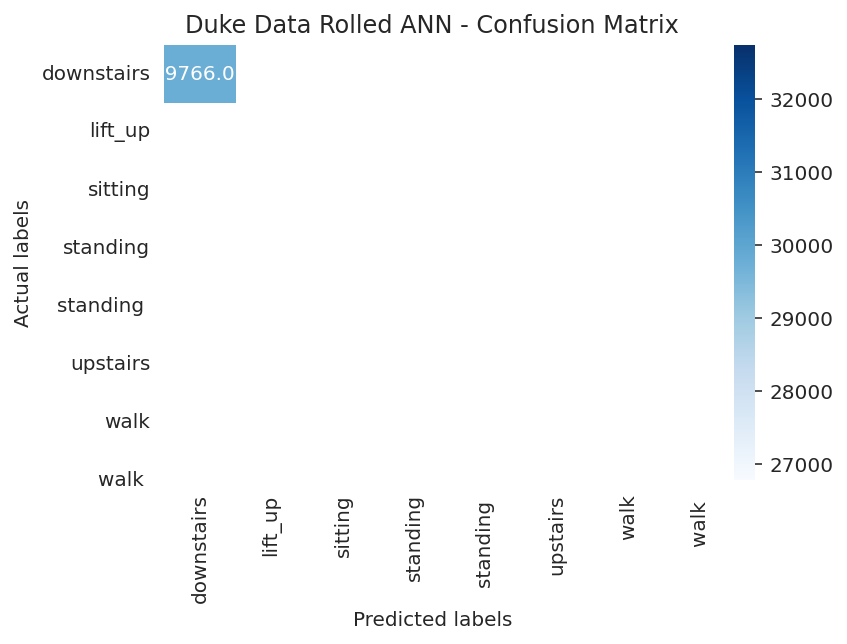

In [99]:

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_pred, y_test)

ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = '.2f',cmap = 'Blues', xticklabels = le.classes_, yticklabels = le.classes_)
ax.set_xlabel("Predicted labels")
ax.set_ylabel('Actual labels')
plt.title('Duke Data Rolled ANN - Confusion Matrix')
# plt.savefig(f'10_figures/ANN_CF.png')
